<a href="https://colab.research.google.com/github/Furankyyy/CS146-Modern-Computational-Statistics/blob/master/CS146_Assignment_3_Call_cent_stan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS146 Assignment 3

**Ziquan Fu**

**2019.10**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pystan

## Implement Models in Stan

### 1. Call Center Data

**Preprocess the data**

In [0]:
waiting_times_day = np.loadtxt("https://course-resources.minerva.kgi.edu/uploaded_files/mke/00124343-8397/call-center.csv")

In [0]:
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

**Stan modeling**

Stan code for the statistical model.

The model is given by:

$\lambda\sim\Gamma(\alpha,\,\beta)$

$X_i\sim \exp(\lambda)$

where $X_i$ is the individual waiting time.


In [0]:
stan_code_exponential = """

data {
    int<lower=0> num_data;
    real<lower=0> waiting_times[num_data];  // number of improved patients per trial
    real<lower=0> alpha;  // fixed prior hyperparameter
    real<lower=0> beta;   // fixed prior hyperparameter
}

parameters {
    real<lower=0> lambda;  // rate parameter of the exponential distribution
}

model {
    lambda ~ gamma(alpha, beta);  // prior over lambda
    for (i in 1:num_data){
        waiting_times[i] ~ exponential(lambda); // likelihood function
      }
}


"""

The data for the call center model.

In [0]:
data_call_center = {
    'num_data': len(waiting_times_per_hour[13]),
    'waiting_times': waiting_times_per_hour[13],
    'alpha': 1,
    'beta':0.25
}

Then, compile and sample from the stan model

In [0]:
stan_call_center = pystan.StanModel(model_code=stan_code_exponential)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a27644e5132f22ee6ee2267c9ff3896e NOW.


In [0]:
results_call_center = stan_call_center.sampling(data=data_call_center)

**Result**

Print the result, the 98% confidence interval.

In [0]:
print('Result:')
print(results_call_center.stansummary(pars=['lambda'], probs=[0.01, 0.99]))

Result:
Inference for Stan model: anon_model_a27644e5132f22ee6ee2267c9ff3896e.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd     1%    99%  n_eff   Rhat
lambda   6.33  8.7e-3   0.33   5.58   7.12   1454    1.0

Samples were drawn using NUTS at Sat Oct 19 21:50:11 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


The 98% confidence interval of the stan model is [5.64,7.09]. The result from the theoretical posterior computation from the class is [5.6,7.1]. The result matches very well.

Visualize the result.

Text(0, 0.5, 'Counts')

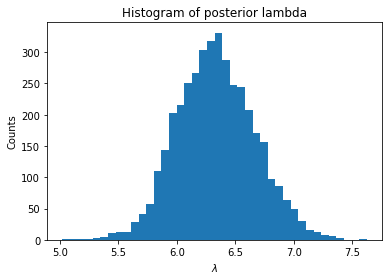

In [0]:
call_center_samples = results_call_center.extract() # Extract posterior samples of the parameter

plt.hist(call_center_samples['lambda'], bins=40)
plt.title('Histogram of posterior lambda')
plt.xlabel('$\lambda$')
plt.ylabel('Counts')

### 2. Normal Likelihood with Normal-inverse-gamma Prior

**Input the data**

In [0]:
data = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])

**Stan modeling**

The model is given by:

$\sigma^{2}\sim\Gamma^{-1}(\alpha,\,\beta)$

$x\sim N(\mu,\sigma^{2}/\nu)$

$D_i\sim N(x,\sigma^{2})$

where $D_i$ is the data points, $x$ is the mean, $\sigma^2$ is the variance, and $\mu, \nu, \alpha, \beta$ are prior parameters of $x$ and $\sigma^2$.

In [0]:
stan_code_normal = """

data {
    int<lower=0> num_data; //number of data points
    real D[num_data]; //data
    real mu;  // mean of x
    real<lower=0> alpha;  // fixed prior hyperparameter
    real<lower=0> beta;   // fixed prior hyperparameter
    real<lower=0> nu; // fixed prior hyperparameter
}

parameters {
    real sigma2; //variance of the normal distribution
    real x;  // mean of the normal distribution

}

model {
    sigma2 ~ inv_gamma(alpha,beta);
    x ~ normal(mu, sqrt(sigma2/nu)); //Stan uses the standard deviation as the input of normal distribution, so take the square root of the variance
    for (i in 1:num_data){
        D[i] ~ normal(x, sqrt(sigma2)); 
    }
       
}

"""

The dictionary for the inputs of the model.

In [0]:
normal_data = {
    'num_data': len(data),
    'D': data,
    'mu': 0,
    'alpha': 1.12,
    'beta': 0.4,
    'nu': 0.054,
}

Compile the model

In [0]:
stan_normal = pystan.StanModel(model_code=stan_code_normal)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_66852fb67ea6e0f643c2bfc6b3c6a3c8 NOW.


In [0]:
results_normal = stan_normal.sampling(data=normal_data)

**Results**

In [0]:
print('Result:')
print(results_normal.stansummary(pars=['x','sigma2'], probs=[0.025, 0.975]))

Result:
Inference for Stan model: anon_model_66852fb67ea6e0f643c2bfc6b3c6a3c8.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%  97.5%  n_eff   Rhat
x        3.06  2.3e-3   0.14   2.79   3.34   3565    1.0
sigma2   3.61  6.2e-3   0.36   2.98    4.4   3362    1.0

Samples were drawn using NUTS at Sat Oct 19 21:51:18 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


The 95% interval result matches the theoretical result in class.

Next, generate 10 posterior samples to plot 10 posterior distributions.

In [0]:
normal_samples = results_normal.extract() # Extract posterior samples of the parameter

# Generate 10 samples
random_sample = np.random.randint(0,4000,size=10) 

# Extract the 10 means and variances
mean = [normal_samples['x'][i] for i in random_sample] 
variance = [normal_samples['sigma2'][i] for i in random_sample]

Text(0.5, 1.0, 'Ten sample distributions from the posterior')

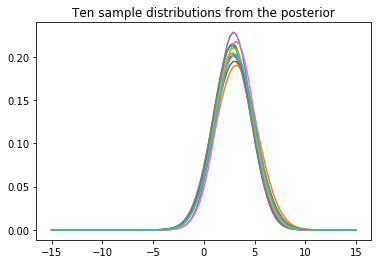

In [0]:
# Plot the results
plot_x = np.linspace(-15,15,100)
for i in range(10):
    plt.plot(plot_x,stats.norm.pdf(plot_x,mean[i],np.sqrt(variance[i])))
plt.title('Ten sample distributions from the posterior')

The plot shows that the posterior samples are very close to each other, meaning that the posterior distribution is very clustered. The plot resembles the one in the class activity.

### 3. Log-normal HRTEM Data

**Import data**

In [0]:
hrtem = np.loadtxt('https://course-resources.minerva.kgi.edu/uploaded_files/mke/00075398-1635/hrtem.csv')

# Log-transform data
log_hrtem = np.log(hrtem)

**Stan modeling**

Similar to question 2, the model is given by:

$\sigma^{2}\sim\Gamma^{-1}(\alpha,\,\beta)$

$x\sim N(\mu,\sigma^{2}/\nu)$

$D_i\sim N(x,\sigma^{2})$

where $D_i$ is the data points, $x$ is the mean, $\sigma^2$ is the variance, and $\mu, \nu, \alpha, \beta$ are prior parameters of $x$ and $\sigma^2$.

In [0]:
stan_code_lognorm = """

data {
    int<lower=0> num_data; //number of data points
    real<lower=0> D[num_data]; //data
    real mu;  // mean of x
    real<lower=0> alpha;  // fixed prior hyperparameter
    real<lower=0> beta;   // fixed prior hyperparameter
    real<lower=0> nu; // fixed prior hyperparameter
}

parameters {
    real sigma2; //variance of the normal distribution
    real x;  // mean of the normal distribution

}

model {
    sigma2 ~ inv_gamma(alpha,beta);
    x ~ normal(mu, sqrt(sigma2/nu)); //Stan uses the standard deviation as the input of normal distribution, so take the square root of the variance
    for (i in 1:num_data){
        D[i] ~ normal(x,sqrt(sigma2));
    }
       
}

"""

The input of the model. The data should be log-transformed.

In [0]:
lognorm_data = {
    'num_data': len(log_hrtem),
    'D': log_hrtem,
    'mu': 2.3,
    'alpha': 2,
    'beta': 5,
    'nu': 0.1,
}

In [0]:
stan_lognorm = pystan.StanModel(model_code=stan_code_lognorm)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_fdae47c8261e316295c7b1403bce8600 NOW.


In [0]:
results_lognorm = stan_lognorm.sampling(data=lognorm_data)

**Result**

In [0]:
print('Result:')
print(results_lognorm.stansummary(pars=['x','sigma2'], probs=[0.025, 0.975]))

Result:
Inference for Stan model: anon_model_fdae47c8261e316295c7b1403bce8600.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%  97.5%  n_eff   Rhat
x        1.89  5.8e-4   0.03   1.83   1.95   2934    1.0
sigma2    0.5  5.6e-4   0.03   0.44   0.56   3227    1.0

Samples were drawn using NUTS at Sat Oct 19 21:52:29 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


Generate 10 samples and plot the posterior result.

In [0]:
lognorm_samples = results_lognorm.extract() # Extract posterior samples of the parameter

# Generate 10 samples
random_sample = np.random.randint(0,4000,size=10)

# Obtain posterior samples
mean_log = [lognorm_samples['x'][i] for i in random_sample]
variance_log = [lognorm_samples['sigma2'][i] for i in random_sample]

Text(0.5, 1.0, 'Posterior log-normal distribution and histogram of HRTEM data')

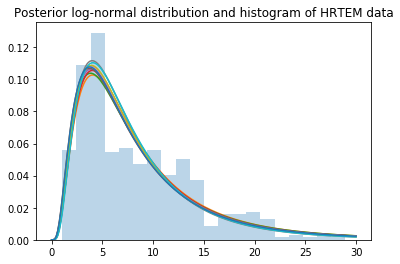

In [0]:
# Plot the results
log_plot_x = np.linspace(0,30,200)

plt.hist(hrtem, bins=20, density=True, alpha=0.3)
for i in range(10):
    plt.plot(log_plot_x, stats.lognorm.pdf(log_plot_x,np.sqrt(variance_log)[i], scale=np.exp(mean_log)[i]))
plt.title('Posterior log-normal distribution and histogram of HRTEM data')

The ten posterior distribution are also very clustered and fit the data well.